In [2]:
## imports
import sys
import os
import numpy as np
import xarray as xr
import cmocean
import matplotlib
import matplotlib.pyplot as plt
import xesmf as xe
import matplotlib.colors as colors
import cartopy
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib import gridspec
import cartopy.mpl.ticker as cticker
import scipy
import scipy.stats

In [3]:
folder = 'Data_processed/' #Data folder
modellist =  ['CCSM4-UoT', 'CESM2', 'IPSL-CM5A2', 'MIROC4m', 'COSMOS', 'HadCM3', 'NorESM1-F']

In [4]:
#Open MOC strengths
dsE280 = xr.open_dataset(folder+'SMM_ensemble/E280/MOC_100yr.nc')
dsE400 = xr.open_dataset(folder+'SMM_ensemble/E400/MOC_100yr.nc')
dsEoi400 = xr.open_dataset(folder+'SMM_ensemble/Eoi400/MOC_100yr.nc')

In [5]:
#Open stratification index
dsE280si = xr.open_dataset(folder+'SMM_ensemble/E280/stratindex_1x1_100yr.nc')
dsE400si = xr.open_dataset(folder+'SMM_ensemble/E400/stratindex_1x1_100yr.nc')
dsEoi400si = xr.open_dataset(folder+'SMM_ensemble/Eoi400/stratindex_1x1_100yr.nc')

dsgrid = xr.open_dataset(folder+'1x1grid.nc')
area = dsgrid.area

stratE280 = dsE280si.rho.where(dsE280si.lat<=-60).weighted(area).mean(dim=['lat','lon'])
stratE400 = dsE400si.rho.where(dsE280si.lat<=-60).weighted(area).mean(dim=['lat','lon'])
stratEoi400 = dsEoi400si.rho.where(dsEoi400si.lat<=-60).weighted(area).mean(dim=['lat','lon'])

In [6]:
# Regression deepmoc and stratification index from MMM
dsE280mmm = xr.open_dataset(folder+'MMM_ensemble/E280/MOC_100yr.nc')
dsEoi400mmm = xr.open_dataset(folder+'MMM_ensemble/Eoi400/MOC_100yr.nc')
deepmocmmm = dsEoi400mmm.deepmoc-dsE280mmm.deepmoc

dsE280simmm = xr.open_dataset(folder+'MMM_ensemble/E280/stratindex_1x1_100yr.nc')
dsEoi400simmm = xr.open_dataset(folder+'MMM_ensemble/Eoi400/stratindex_1x1_100yr.nc')
siE280mmm = dsE280simmm.rho.where(dsE280simmm.lat<=-60).weighted(area).mean(dim=['lat','lon'])
siEoi400mmm = dsEoi400simmm.rho.where(dsEoi400simmm.lat<=-60).weighted(area).mean(dim=['lat','lon'])
stranommmm = siEoi400mmm-siE280mmm

pmmm = scipy.stats.linregress(stranommmm, deepmocmmm)

Text(0.0, 1.0, '(b)')

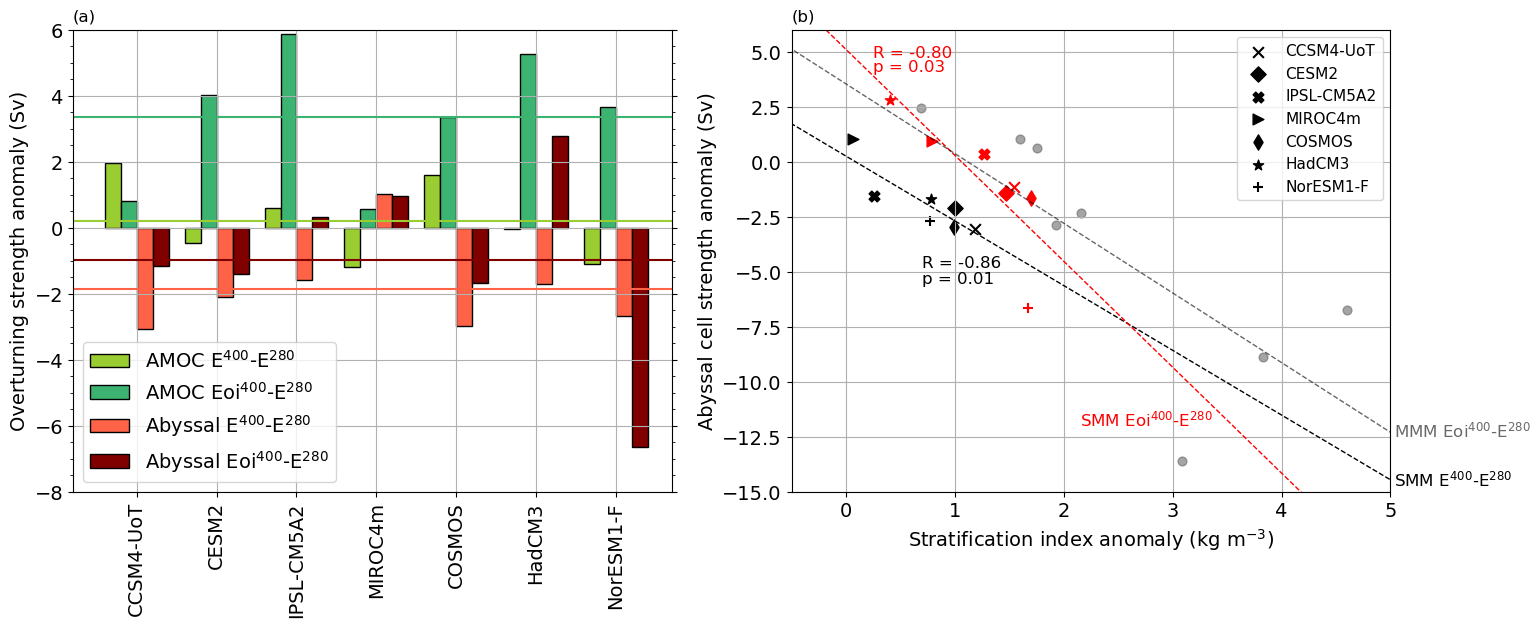

In [7]:
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.rcParams['axes.labelsize'] = 14

fig = plt.figure(figsize=(17,6))
spec = fig.add_gridspec(1, 2)


ax = fig.add_subplot(spec[:, 0])

barWidth = 0.2
a = dsEoi400.amoc-dsE280.amoc
s = dsEoi400.deepmoc-dsE280.deepmoc

a1 = dsE400.amoc-dsE280.amoc
s1 = dsE400.deepmoc - dsE280.deepmoc


# The x position of bars
r1 = np.arange(len(a))
r2 = [x + barWidth for x in r1]
r3 = [x + 2*barWidth for x in r1]
r4 = [x + 3*barWidth for x in r1]

ax.plot([-0.5, 8], [np.mean(a),np.mean(a)], color='mediumseagreen')
ax.plot([-0.5, 8], [np.mean(a1),np.mean(a1)], color='yellowgreen')
ax.plot([-0.5, 8], [np.mean(s1),np.mean(s1)], color='tomato')
ax.plot([-0.5, 8], [np.mean(s),np.mean(s)], color='maroon')

ax.bar(r1, a1,  width = barWidth, color = 'yellowgreen', edgecolor = 'black', capsize=7, label=r'AMOC E$^{400}$-E$^{280}$',  alpha=1)
ax.bar(r2, a,  width = barWidth, color = 'mediumseagreen', edgecolor = 'black', capsize=7, label='AMOC Eoi$^{400}$-E$^{280}$',  alpha=1)
ax.bar(r3, s1,  width = barWidth, color = 'tomato', edgecolor = 'black', capsize=7, label='Abyssal E$^{400}$-E$^{280}$', alpha=1)
ax.bar(r4, s,  width = barWidth, color = 'maroon', edgecolor = 'black', capsize=7, label='Abyssal Eoi$^{400}$-E$^{280}$')

ax.set_xticks([r + 1.5*barWidth for r in range(len(a))])
ax.set_xticklabels(modellist, rotation='vertical', fontsize=14)
ax.set_xlim([-0.5,7])
ax.set_ylim([-8,6])
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(which='minor', bottom=False)
ax.set_ylabel('Overturning strength anomaly (Sv)', fontsize=14)
ax.legend(fontsize=14)
ax.grid()
ax.set_title(r'(a)', loc='left')

ax = fig.add_subplot(spec[:, 1])
markers = ["x","D","X",">","d","*","+"]

p1 = scipy.stats.linregress((stratE400-stratE280), s1)
p = scipy.stats.linregress((stratEoi400-stratE280), s)

#Plot non-special models in lightgrey circles
#['GISS2.1G', 'EC-Earth3-LR', 'CCSM4-UoT', 'CCSM4-Utr','CCSM4', 'CESM1.2', 'CESM2', 'IPSL-CM5A', 'IPSL-CM5A2','IPSL-CM6A','MIROC4m','COSMOS', 'HadCM3', 'NorESM1-F','HadGEM3']
nonsmodels = [0,1,3,4,5,7,9,14]
for j in nonsmodels:
    scatter = ax.scatter((siEoi400mmm-siE280mmm)[j], deepmocmmm[j], s=40, c='dimgrey', marker='o', alpha=0.6)
    
for j in range(0,len(modellist)):
    scatter = ax.scatter((stratE400-stratE280)[j], s1[j], s=60, c = 'black', label=modellist[j], marker=markers[j])
    scatter = ax.scatter((stratEoi400-stratE280)[j], s[j], s=60, c = 'red', marker=markers[j])

ax.set_ylim([-15, 6])
ax.set_xlim([-0.5, 5])    
    
ax.set_xlabel('Stratification index anomaly (kg m$^{-3}$)')
ax.set_ylabel(r'Abyssal cell strength anomaly (Sv)')

ax.legend(loc='upper right', fontsize=11)
ax.grid()

x = np.arange(-200,100,1)
ax.plot(x, x*p1[0]+p1[1], color='black',linewidth =1, linestyle ='--')    
ax.text(0.7,-4.8,'R = %.2f' %(p1[2]), fontsize=12, color='black')
ax.text(0.7,-5.55, 'p = %.2f' %(p1[3]), fontsize=12, color='black')
ax.text(5.03,-14.75, 'SMM E$^{400}$-E$^{280}$', fontsize=12, color='black')

ax.plot(x, x*p[0]+p[1], color='red',linewidth =1, linestyle ='--')   
ax.text(0.25,4.75,'R = %.2f' %(p[2]), fontsize=12, color='red')
ax.text(0.25,4.10, 'p = %.2f' %(p[3]), fontsize=12, color='red')
#ax.text(3.75,-13, 'SMM Eoi$^{400}$-E$^{280}$', fontsize=12, color='red')
ax.text(2.15,-12, 'SMM Eoi$^{400}$-E$^{280}$', fontsize=12, color='red')

ax.plot(x, x*pmmm[0]+pmmm[1], color='black',linewidth =1, linestyle ='--', alpha=0.6)   
ax.text(5.03,-12.5, 'MMM Eoi$^{400}$-E$^{280}$', fontsize=12, color='dimgrey')

ax.set_title(r'(b)', loc='left')
#plt.savefig('Fig10.png', bbox_inches='tight')

In [8]:
print('The SMM Eoi400-E280 abyssal cell strength anomaly is %.1f Sv (%.0f%%)' %(s.mean(), s.mean()/dsE280.deepmoc.mean()*100))
print('The SMM Eoi400-E280 AMOC cell strength anomaly is %.1f Sv (%.0f %%)' %(a.mean(), a.mean()/dsE280.amoc.mean()*100))

The SMM Eoi400-E280 abyssal cell strength anomaly is -1.0 Sv (-8%)
The SMM Eoi400-E280 AMOC cell strength anomaly is 3.4 Sv (18 %)


In [9]:
print('The SMM E400-E280 abyssal cell strength anomaly is %.1f Sv (%.0f%%)' %(s1.mean(), s1.mean()/dsE280.deepmoc.mean()*100))
print('The SMM E400-E280 AMOC cell strength anomaly is %.1f Sv (%.0f %%)' %(a1.mean(), a1.mean()/dsE280.amoc.mean()*100))

The SMM E400-E280 abyssal cell strength anomaly is -1.9 Sv (-15%)
The SMM E400-E280 AMOC cell strength anomaly is 0.2 Sv (1 %)
